<a href="https://colab.research.google.com/github/hyo250/gittest/blob/master/%ED%94%BC%EB%A7%88_%EC%9D%B8%EB%94%94%EC%96%B8_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
cd /content/drive/MyDrive/인공지능실습/모두의 딥러닝

/content/drive/MyDrive/인공지능실습/모두의 딥러닝


In [2]:
import pandas as pd
import numpy as np

In [16]:
df=pd.read_csv('./dataset/pima-indians-diabetes.csv', names=['pregnant', 'plasma','insulin','bmi','pedigre','age','class']).reset_index()
df.columns=['pregnant', 'plasma','pressure','thickness','insulin','bmi','pedigre','age','class']
df

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigre,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [17]:
df.describe()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigre,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   768 non-null    int64  
 1   plasma     768 non-null    int64  
 2   pressure   768 non-null    int64  
 3   thickness  768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   bmi        768 non-null    float64
 6   pedigre    768 non-null    float64
 7   age        768 non-null    int64  
 8   class      768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [19]:
df.isna().sum() #결측치는 없음.

pregnant     0
plasma       0
pressure     0
thickness    0
insulin      0
bmi          0
pedigre      0
age          0
class        0
dtype: int64

프로젝트의 목적: 당뇨병의 발병에 영향을 미치는 요인이 뭘까?
- 당뇨병 발생 유무= class 변수

In [21]:
#임신횟수에 따른 당뇨병 데이터를 임신횟수에 따라 모으고, 그 평균값에 따라 내림차순으로 정렬
df[['pregnant','class']].groupby(['pregnant'], as_index=False).mean().sort_values(by='pregnant', ascending=True)


,pregnant,class
0,0,0.342342
1,1,0.214815
2,2,0.184466
3,3,0.360000
4,4,0.338235
5,5,0.368421
6,6,0.320000
7,7,0.555556
8,8,0.578947
9,9,0.642857


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

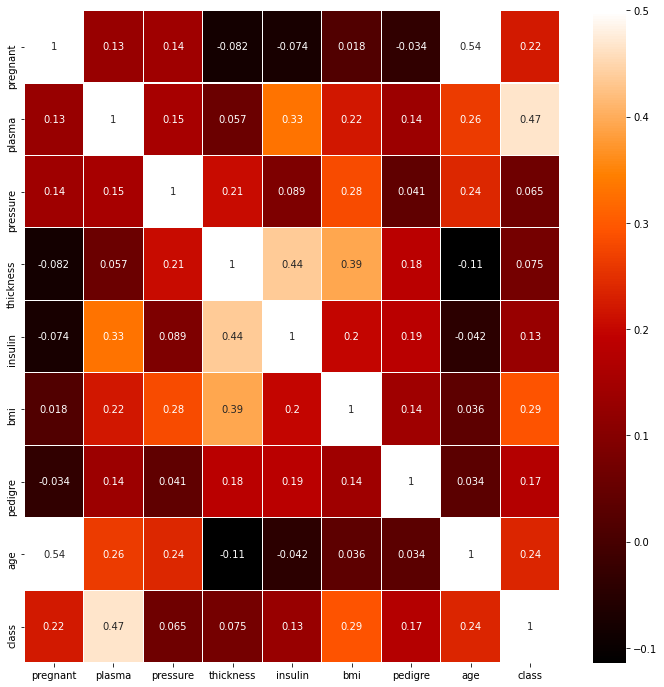

In [24]:
#변수별 상관관계 히트맵그려 살펴보기
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), linewidths=0.1, vmax=0.5, cmap=plt.cm.gist_heat, linecolor='white', annot=True)
plt.show()

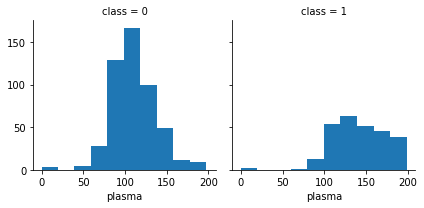

In [25]:
#위의 그림을보면 class랑 plasma에서 높은 상관을 보임... 0.47
grid=sns.FacetGrid(df, col='class')
grid.map(plt.hist, 'plasma', bins=10)
plt.show()

- plasma 수치가 150이 넘어가면 당뇨병 발생확률이 높은듯!!


## 케라스로 당뇨병 예측 실행하기

In [26]:
#케라스 함수 호출
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf

In [27]:
#seed값 생성
np.random.seed(100)
tf.random.set_seed(100)

In [30]:
print(df.shape) #총 768개의 개별데이터(샘플), 9개의 컬럼(8개는 x변수, 1개는 class(y변수))

(768, 9)


In [32]:
#모델의 설정
model=Sequential()
model.add(Dense(12, input_dim=8, activation='relu')) #은닉층+입력층. #input_dim=8인 이유... x변수가 8개임
model.add(Dense(8, activation='relu')) #은닉층 
model.add(Dense(1, activation='sigmoid')) # 출력층. 노드는 1로!!

In [37]:
#당뇨병 여부 0(아니다), 1(당뇨병) 이므로==>이항분류(binary classfication)
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [34]:
dataset=np.loadtxt('./dataset/pima-indians-diabetes.csv', delimiter=',')
X=dataset[:, 0:8]
Y=dataset[:,8]

In [38]:
#모델 실행
model.fit(X, Y, epochs=200, batch_size=10)

Epoch 1/200
77/77 [==============================] - 1s 1ms/step - loss: 1.8260 - accuracy: 0.5469
Epoch 2/200
77/77 [==============================] - 0s 1ms/step - loss: 0.8830 - accuracy: 0.5859
Epoch 3/200
77/77 [==============================] - 0s 1ms/step - loss: 0.7927 - accuracy: 0.6094
Epoch 4/200
77/77 [==============================] - 0s 1ms/step - loss: 0.7601 - accuracy: 0.6328
Epoch 5/200
77/77 [==============================] - 0s 1ms/step - loss: 0.7210 - accuracy: 0.6185
Epoch 6/200
77/77 [==============================] - 0s 1ms/step - loss: 0.7103 - accuracy: 0.6302
Epoch 7/200
77/77 [==============================] - 0s 2ms/step - loss: 0.6842 - accuracy: 0.6211
Epoch 8/200
77/77 [==============================] - 0s 1ms/step - loss: 0.6760 - accuracy: 0.6419
Epoch 9/200
77/77 [==============================] - 0s 1ms/step - loss: 0.6666 - accuracy: 0.6458
Epoch 10/200
77/77 [==============================] - 0s 1ms/step - loss: 0.6516 - accuracy: 0.6354
Epoch 11/

In [39]:
#결과출력
print('accuracy: %.4f' %(model.evaluate(X,Y)[1]))

24/24 [==============================] - 0s 1ms/step - loss: 0.5450 - accuracy: 0.7305
accuracy: 0.7305
